In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from chart import show, show_collection

### Math Morphology

#### Erosion

A more simple example of the erosion operation is the following:

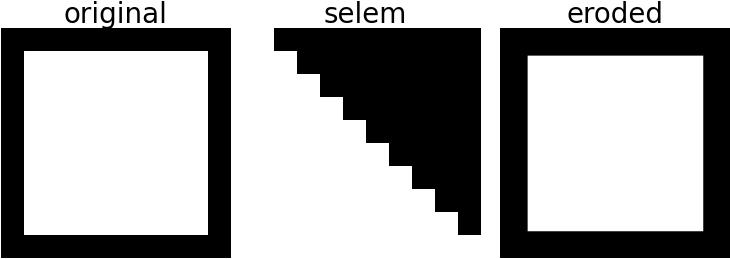

In [3]:
import numpy as np
from skimage.morphology import binary_erosion

# Create a 250x250 image
image = np.zeros((250, 250), dtype=np.uint8)

# Calculate the starting and ending indices for the square
start = 25
end = 225

# Set the square region to 1
image[start:end, start:end] = 1

# Create a 10x10 structuring element with a triangular shape
selem = np.zeros((10, 10), dtype=np.uint8)
selem[np.tril_indices(10, 0)] = 1

# Perform erosion
eroded_image = binary_erosion(image, selem)

# Display the result
show_collection([image, selem, eroded_image], titles=["original", "selem", "eroded"], cmap="gray", scale=0.1, fontsize=20)


A more interesting example is the following:

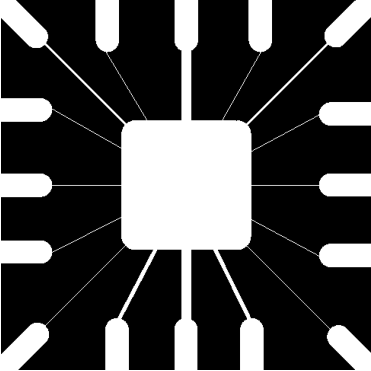

In [4]:
from skimage import io
import numpy as np

image = np.logical_not(io.imread('wirebond.tif'))
image = image.astype(int)
show(image, cmap="gray", scale=0.1)

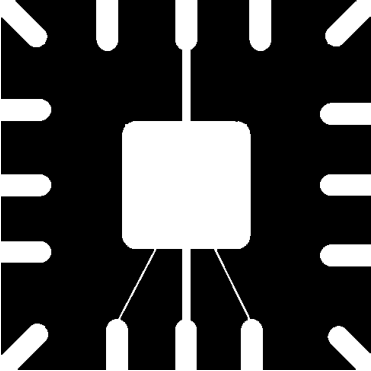

In [5]:
from skimage.morphology import square, binary_erosion
from chart import show

# create a square structured element
selem = square(3)  # you can change the size of the square as needed

# erode the image
eroded_image = binary_erosion(image, selem)

# display the eroded image
show(eroded_image, cmap="gray", scale=0.1)


#### Erosion with multiple structuring elements

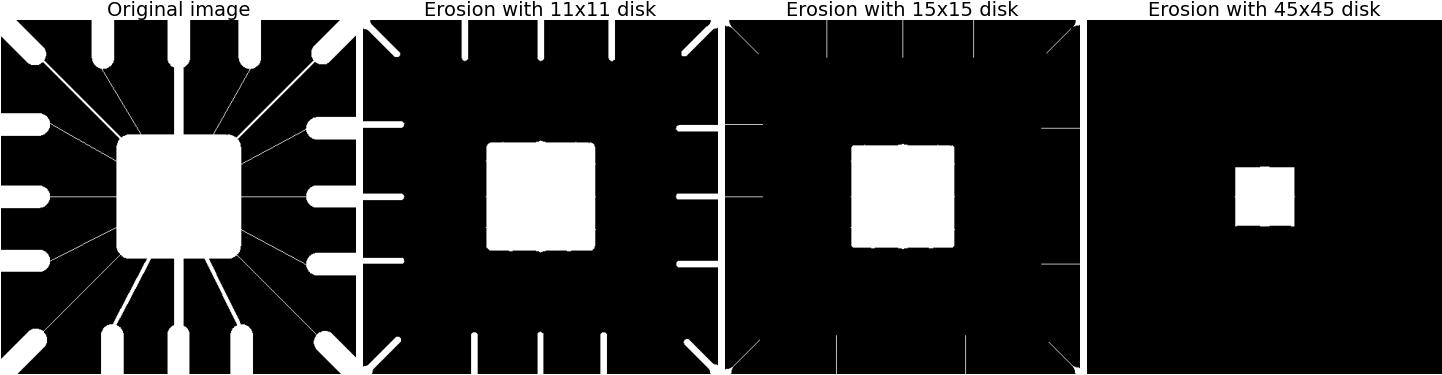

In [8]:
from skimage.morphology import disk, binary_erosion
from chart import show_collection

# eroded images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [11, 15, 45]:
    selem = disk(s)
    eroded_image = binary_erosion(image, selem)
    images.append(eroded_image)
    titles.append('Erosion with {}x{} disk'.format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap="gray")

### Dilation

A simple example:

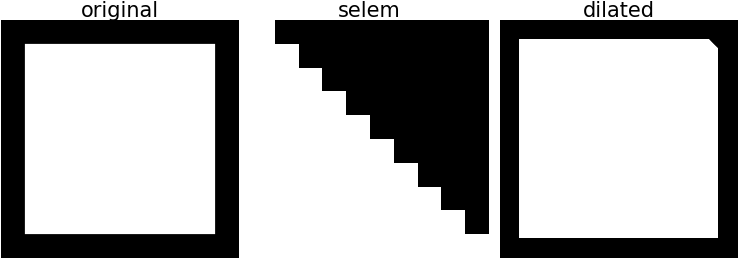

In [21]:
import numpy as np
from skimage.morphology import binary_dilation

# Create a 250x250 image
image = np.zeros((250, 250), dtype=np.uint8)

# Calculate the starting and ending indices for the square
start = 25
end = 225

# Set the square region to 1
image[start:end, start:end] = 1

# Create a 10x10 structuring element with a triangular shape
selem = np.zeros((10, 10), dtype=np.uint8)
selem[np.tril_indices(10, 0)] = 1

# Perform dilation
dilated_image = binary_dilation(image, selem)

# Display the result
show_collection([image, selem, dilated_image], titles=["original", "selem", "dilated"], cmap="gray", scale=0.1, fontsize=15)

A more interesting example is the following:

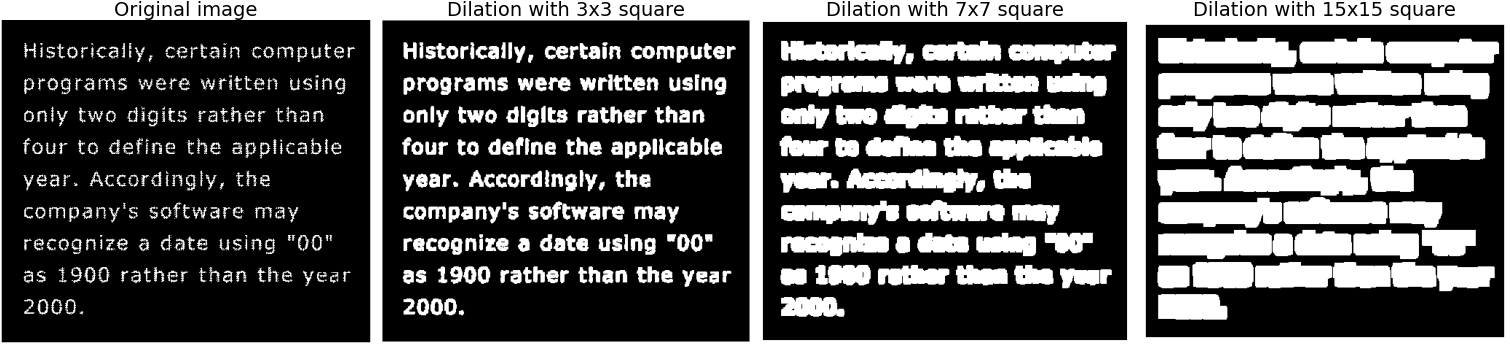

In [11]:
from skimage.morphology import square, binary_dilation
from chart import show_collection

# load the image
image = io.imread("text.tif")

# dilated images
images = [image]

# titles for each image
titles = ["Original image"]

# create the structuring elements
for s in [3, 7, 15]:
    selem = square(s)
    dilated_image = binary_dilation(image, selem)
    images.append(dilated_image)
    titles.append("Dilation with {}x{} square".format(s, s))

# display the eroded images
show_collection(images, titles, fontsize=14, scale=0.075, cmap="gray")

### Closing

$A \bullet B = (A \oplus B) \ominus B$

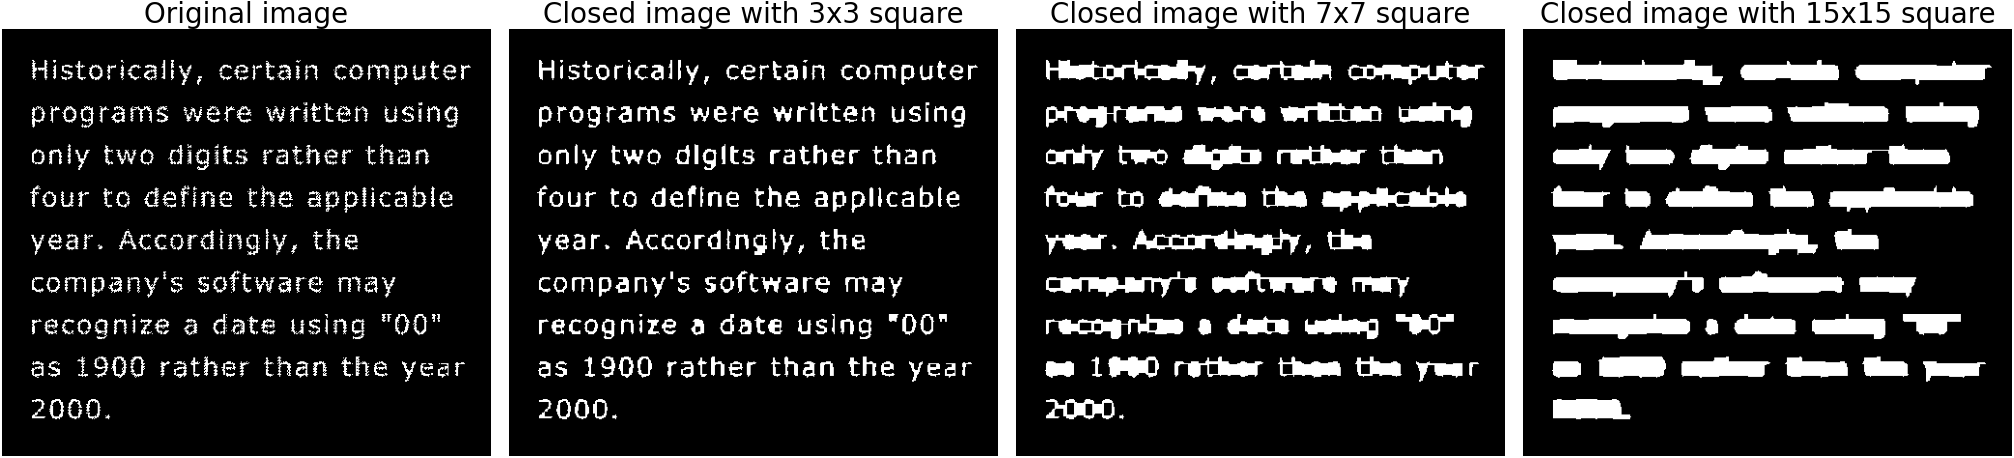

In [16]:
from skimage.morphology import square, binary_closing
import matplotlib.pyplot as plt

# load the image
image = io.imread("text.tif")

# images after closing
images = [image]
titles = ["Original image"]

for s in [3, 7, 15]:
    # Define the structuring element
    selem = square(s)
    
    # Perform closing
    closed = binary_closing(image, selem)
    images.append(closed)

    titles.append("Closed image with {}x{} square".format(s, s))

show_collection(images, titles, fontsize=20, scale=0.1, cmap="gray")

Filtering binary images with opening and closing. The opening operation is defined as:

$A \circ B = (A \ominus B) \oplus B$

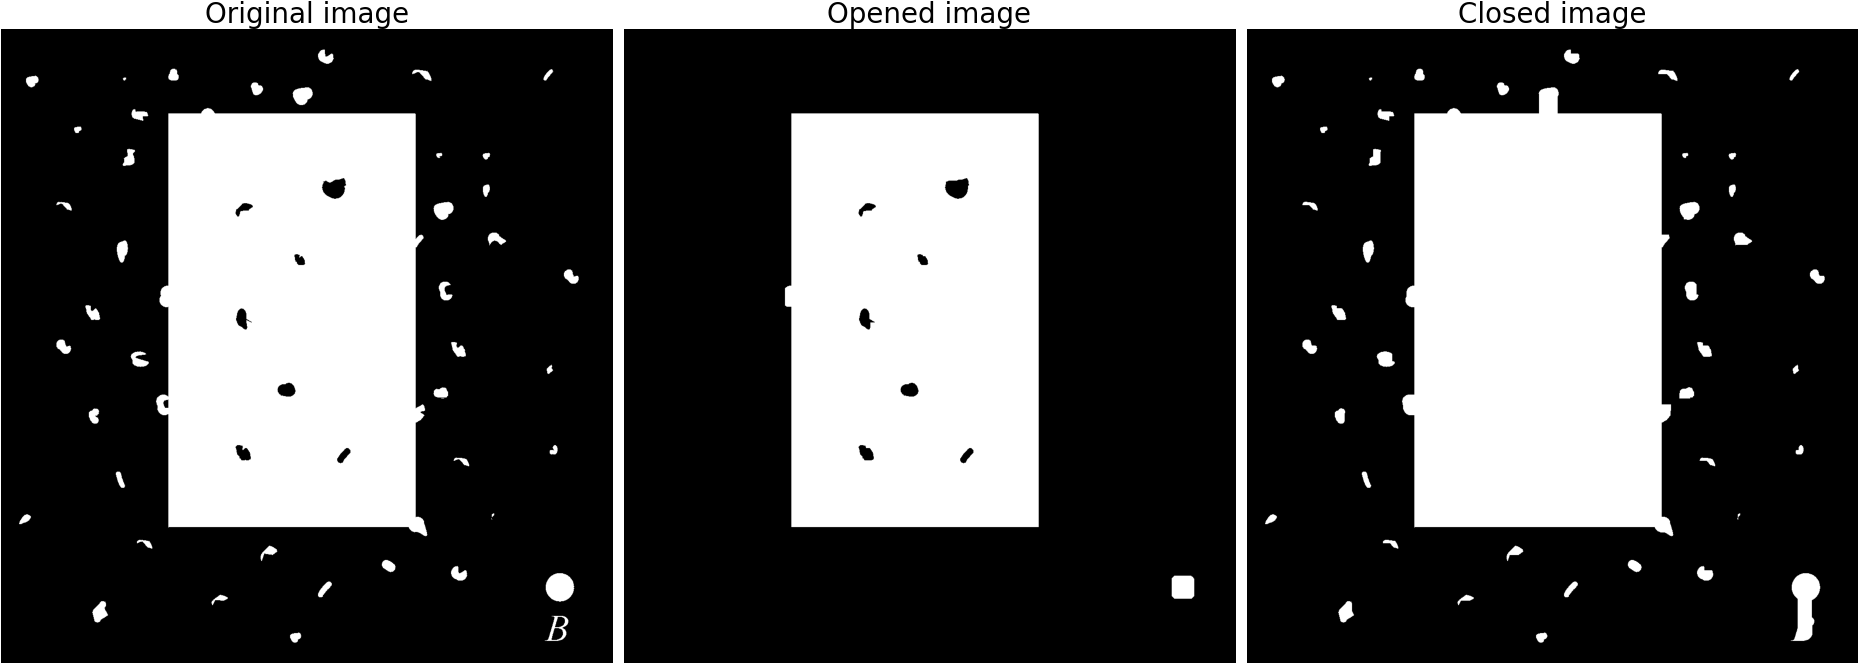

In [19]:
from skimage.morphology import square, binary_opening, binary_closing
import matplotlib.pyplot as plt

# load the image
image = io.imread("noisy.tif")

# Define the structuring element
selem = square(35)

# Perform opening and closing
opened = binary_opening(image, selem)
closed = binary_closing(image, selem)
titles = ['Original image', 'Opened image', 'Closed image']

show_collection([image, opened, closed], titles, scale=0.05, cmap="gray", fontsize=20)